<a href="https://colab.research.google.com/github/claudiolucinda/ReinfLearning/blob/master/Ex03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

class Agent():
  def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end,
                eps_dec):
      self.lr = lr
      self.gamma = gamma
      self.n_actions = n_actions
      self.n_states = n_states
      self.epsilon = eps_start
      self.eps_min = eps_end
      self.eps_dec = eps_dec
      # Inicializando como vazio
      self.Q = {}

      self.init_Q()

  def init_Q(self):
      for state in range(self.n_states):
          for action in range(self.n_actions):
              self.Q[(state, action)] = 0.0

  def choose_action(self, state):
      if np.random.random() < self.epsilon:
          action = np.random.choice([i for i in range(self.n_actions)])
      else:
          # Lista ações e compara escolhendo o maior
          actions = np.array([self.Q[(state, a)] \
                              for a in range(self.n_actions)])
          action = np.argmax(actions)
      return action

  def decrement_epsilon(self):
      self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min\
                      else self.eps_min

  def learn(self, state, action, reward, state_):
      actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
      a_max = np.argmax(actions)

      self.Q[(state, action)] += self.lr*(reward +
                                      self.gamma*self.Q[(state_, a_max)] -
                                      self.Q[(state, action)])
      self.decrement_epsilon()

episode  0 win_pct 0.000000 epsilon 0.999998
episode  1000 win_pct 0.010000 epsilon 0.996324
episode  2000 win_pct 0.000000 epsilon 0.992435
episode  3000 win_pct 0.050000 epsilon 0.988506
episode  4000 win_pct 0.010000 epsilon 0.984813
episode  5000 win_pct 0.010000 epsilon 0.981098
episode  6000 win_pct 0.020000 epsilon 0.977374
episode  7000 win_pct 0.000000 epsilon 0.973488
episode  8000 win_pct 0.020000 epsilon 0.969847
episode  9000 win_pct 0.000000 epsilon 0.966203
episode  10000 win_pct 0.030000 epsilon 0.962536
episode  11000 win_pct 0.040000 epsilon 0.958889
episode  12000 win_pct 0.010000 epsilon 0.955283
episode  13000 win_pct 0.000000 epsilon 0.951527
episode  14000 win_pct 0.010000 epsilon 0.947812
episode  15000 win_pct 0.010000 epsilon 0.944021
episode  16000 win_pct 0.000000 epsilon 0.940372
episode  17000 win_pct 0.020000 epsilon 0.936602
episode  18000 win_pct 0.010000 epsilon 0.933001
episode  19000 win_pct 0.010000 epsilon 0.929323
episode  20000 win_pct 0.000000 e

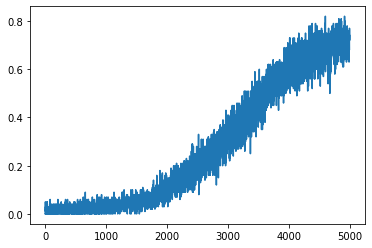

In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v0")

n_games=500000
win_pct=[]
scores=[]


results_make=np.zeros((n_games))



# LEFT = 0 DOWN = 1 RIGHT = 2 UP = 3
# SFFF
# FHFH
# FFFH
# HFFG
#policy = {0: 1, 1: 2, 2: 1, 3: 0, 4:1, 6: 1, 8:2, 9:1, 10:1, 13: 2, 14:2}

agent=Agent(0.001,.9,4,16,1.0,.001,.9999995)

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
      #action = env.action_space.sample() # your agent here (this takes random actions)
      #action = policy[obs]
      
      action = agent.choose_action(observation)
      observation_, reward, done, info = env.step(action)
      agent.learn(observation,action,reward,observation_)
      score+=reward
      observation = observation_

    scores.append(score)
    if i % 100 == 0:
        average = np.mean(scores[-100:])
        win_pct.append(average)
        if i % 1000 == 0:
          print('episode ', i, 'win_pct %2f' % average, 'epsilon %2f' % agent.epsilon)

plt.plot(win_pct)
plt.show()
